In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dots.csv')
print(df)

    align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]


In [3]:
df.isnull()

,align,choice,time,coherence,firing_rate
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
843,False,False,False,False,False
844,False,False,False,False,False
845,False,False,False,False,False
846,False,False,False,False,False


In [5]:
df.columns

Index(['align', 'choice', 'time', 'coherence', 'firing_rate'], dtype='object')

In [7]:
missing=(df[['align', 'choice', 'time', 'coherence', 'firing_rate']]==0).sum()
print(missing)

align            0
choice           0
time            24
coherence      174
firing_rate      0
dtype: int64


In [9]:
a=df.head(10)
a

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
5,dots,T1,-80,51.2,34.987571
6,dots,T1,-60,0.0,32.868526
7,dots,T1,-60,3.2,35.119048
8,dots,T1,-60,6.4,34.841076
9,dots,T1,-60,12.8,35.648148


In [10]:
df.index

RangeIndex(start=0, stop=848, step=1)

In [11]:
df.ndim

2

In [12]:
df.size

4240

In [13]:
df.shape

(848, 5)

In [14]:
df.sum(axis=0)

align          dotsdotsdotsdotsdotsdotsdotsdotsdotsdotsdotsdo...
choice         T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1T1...
time                                                       62880
coherence                                                10937.6
firing_rate                                         33594.929164
dtype: object

In [15]:
df.sum(axis=1)

0      -46.810033
1      -45.108274
2      -39.320160
3      -34.568126
4      -19.339513
          ...    
843    336.481734
844    333.983979
845    341.311530
846    352.609804
847    382.159302
Length: 848, dtype: float64

In [16]:
df.describe()

,time,coherence,firing_rate
count,848.000000,848.000000,848.000000
mean,74.150943,12.898113,39.616662
std,284.596669,15.453506,12.232967
min,-600.000000,0.000000,6.275720
25%,-100.000000,3.200000,32.620191
50%,80.000000,6.400000,38.022005
75%,260.000000,12.800000,47.383649
max,720.000000,51.200000,70.048900


In [17]:
df.sort_index(axis=1,ascending=False)

,time,firing_rate,coherence,choice,align
0,-80,33.189967,0.0,T1,dots
1,-80,31.691726,3.2,T1,dots
2,-80,34.279840,6.4,T1,dots
3,-80,32.631874,12.8,T1,dots
4,-80,35.060487,25.6,T1,dots
...,...,...,...,...,...
843,300,33.281734,3.2,T2,sacc
844,300,27.583979,6.4,T2,sacc
845,300,28.511530,12.8,T2,sacc
846,300,27.009804,25.6,T2,sacc


In [18]:
df1=pd.DataFrame(df,columns=['choice','align'])
print(df1)

    choice align
0       T1  dots
1       T1  dots
2       T1  dots
3       T1  dots
4       T1  dots
..     ...   ...
843     T2  sacc
844     T2  sacc
845     T2  sacc
846     T2  sacc
847     T2  sacc

[848 rows x 2 columns]


In [22]:
d=pd.RangeIndex(848)
d

RangeIndex(start=0, stop=848, step=1)

In [25]:
df3=df.reindex(index=d[0:10],columns=list(df.columns)+['new_col'])
df3.loc[d[0]:d[6],'new_col']=1
print(df3)

  align choice  time  coherence  firing_rate  new_col
0  dots     T1   -80        0.0    33.189967      1.0
1  dots     T1   -80        3.2    31.691726      1.0
2  dots     T1   -80        6.4    34.279840      1.0
3  dots     T1   -80       12.8    32.631874      1.0
4  dots     T1   -80       25.6    35.060487      1.0
5  dots     T1   -80       51.2    34.987571      1.0
6  dots     T1   -60        0.0    32.868526      1.0
7  dots     T1   -60        3.2    35.119048      NaN
8  dots     T1   -60        6.4    34.841076      NaN
9  dots     T1   -60       12.8    35.648148      NaN


In [27]:
df3.dropna()

,align,choice,time,coherence,firing_rate,new_col
0,dots,T1,-80,0.0,33.189967,1.0
1,dots,T1,-80,3.2,31.691726,1.0
2,dots,T1,-80,6.4,34.279840,1.0
3,dots,T1,-80,12.8,32.631874,1.0
4,dots,T1,-80,25.6,35.060487,1.0
5,dots,T1,-80,51.2,34.987571,1.0
6,dots,T1,-60,0.0,32.868526,1.0


In [28]:
df3.fillna(value=2)

,align,choice,time,coherence,firing_rate,new_col
0,dots,T1,-80,0.0,33.189967,1.0
1,dots,T1,-80,3.2,31.691726,1.0
2,dots,T1,-80,6.4,34.279840,1.0
3,dots,T1,-80,12.8,32.631874,1.0
4,dots,T1,-80,25.6,35.060487,1.0
5,dots,T1,-80,51.2,34.987571,1.0
6,dots,T1,-60,0.0,32.868526,1.0
7,dots,T1,-60,3.2,35.119048,2.0
8,dots,T1,-60,6.4,34.841076,2.0
9,dots,T1,-60,12.8,35.648148,2.0


In [29]:
df3.mean()

time          -72.000000
coherence      12.160000
firing_rate    34.031826
new_col         1.000000
dtype: float64

In [31]:
df4=[df[:10],df[500:800],df[800:]]
df4

[  align choice  time  coherence  firing_rate
 0  dots     T1   -80        0.0    33.189967
 1  dots     T1   -80        3.2    31.691726
 2  dots     T1   -80        6.4    34.279840
 3  dots     T1   -80       12.8    32.631874
 4  dots     T1   -80       25.6    35.060487
 5  dots     T1   -80       51.2    34.987571
 6  dots     T1   -60        0.0    32.868526
 7  dots     T1   -60        3.2    35.119048
 8  dots     T1   -60        6.4    34.841076
 9  dots     T1   -60       12.8    35.648148,
     align choice  time  coherence  firing_rate
 500  sacc     T1   -80        6.4    63.680395
 501  sacc     T1   -80       12.8    63.797506
 502  sacc     T1   -80       25.6    60.746123
 503  sacc     T1   -80       51.2    61.654558
 504  sacc     T1   -60        0.0    63.991838
 ..    ...    ...   ...        ...          ...
 795  sacc     T2   140        3.2    29.643963
 796  sacc     T2   140        6.4    29.069767
 797  sacc     T2   140       12.8    30.241090
 798  sacc   

In [32]:
pd.concat(df4)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


In [34]:
import csv

In [36]:
a = df['align'].tolist()
b = df['choice'].tolist()
c = df['time'].tolist()
d = df['coherence'].tolist()
e = df['firing_rate'].tolist()

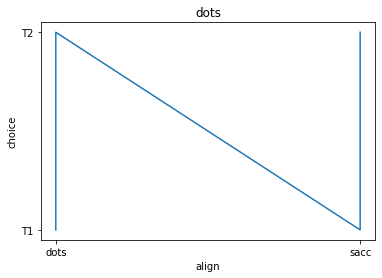

In [43]:
plt.plot(a,b)
plt.xlabel('align')
plt.ylabel('choice')
plt.title('dots')
plt.show()

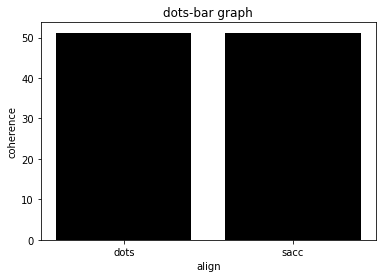

In [49]:
plt.bar(a,d,color='k')
plt.xlabel('align')
plt.ylabel('coherence')
plt.title('dots-bar graph')
plt.show()

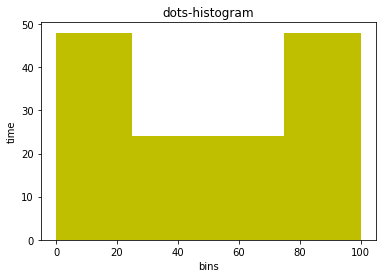

In [52]:
plt.hist(c,bins=[0,25,50,75,100],color='y')
plt.xlabel('bins')
plt.ylabel('time')
plt.title('dots-histogram')
plt.show()

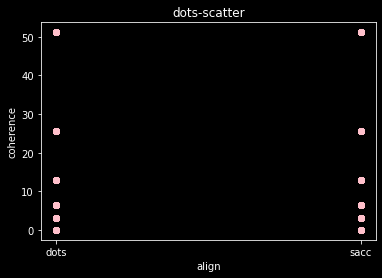

In [59]:
from matplotlib import style
style.use('dark_background')
plt.scatter(a,d,color='pink')
plt.xlabel('align')
plt.ylabel('coherence')
plt.title('dots-scatter')
plt.show()

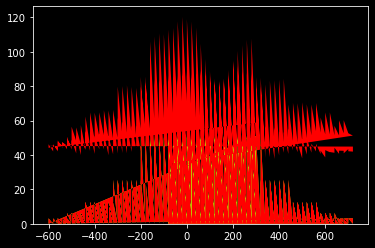

In [63]:
plt.plot([],[],label='c',linewidth=5)
plt.plot([],[],label='d',linewidth=5)
plt.plot([],[],label='e',linewidth=5)
plt.stackplot(c,d,e,colors=['y','r','w'])
plt.show()

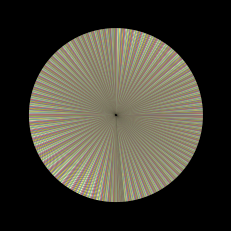

In [69]:
plt.pie(e)
plt.show()

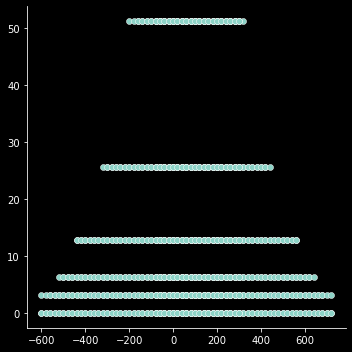

In [71]:
sns.relplot(x=c,y=d,data=df)


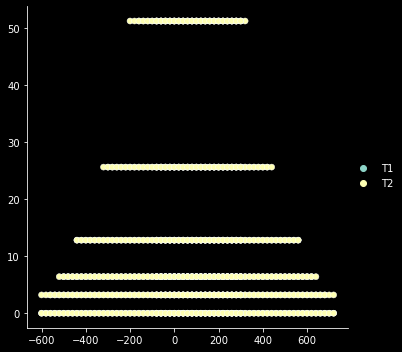

In [72]:
sns.relplot(x=c,y=d,data=df,hue=b)

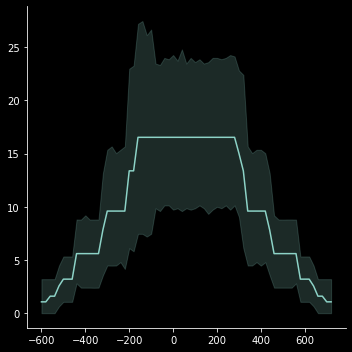

In [73]:
sns.relplot(x=c,y=d,data=df,kind='line')

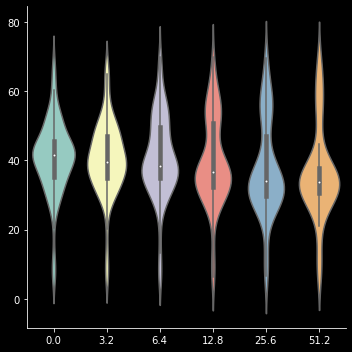

In [76]:
sns.catplot(x=d,y=e,data=df,kind='violin')

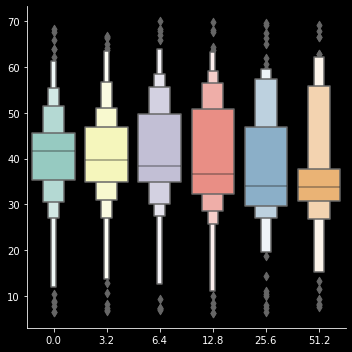

In [77]:
sns.catplot(x=d,y=e,data=df,kind='boxen')

In [78]:
from scipy import stats

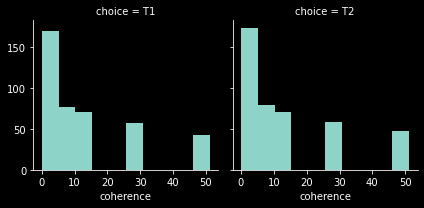

In [81]:
x=sns.FacetGrid(df,col="choice")
x.map(plt.hist,"coherence")

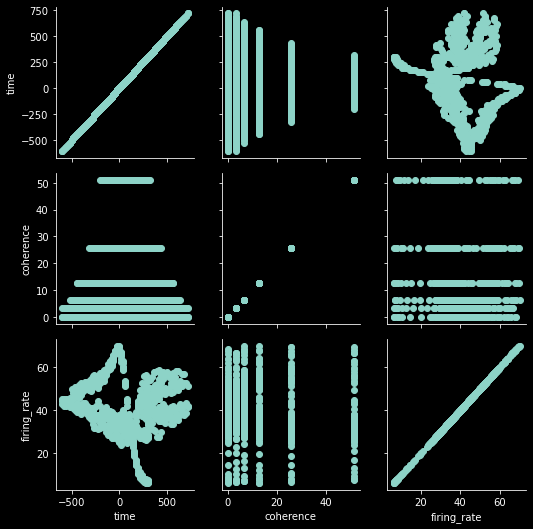

In [82]:
y=sns.PairGrid(df)
y.map(plt.scatter)

<AxesSubplot:xlabel='align', ylabel='coherence'>

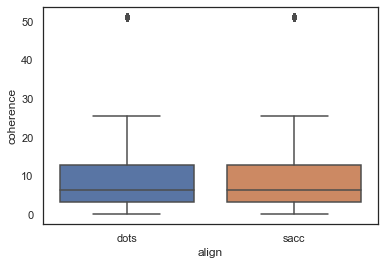

In [83]:
sns.set(style="white",color_codes=True)
sns.boxplot(x="align",y="coherence",data=df)

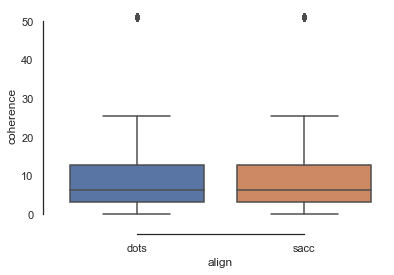

In [84]:
sns.set(style="white",color_codes=True)
sns.boxplot(x="align",y="coherence",data=df)
sns.despine(offset=10,trim=True)

<AxesSubplot:xlabel='coherence'>

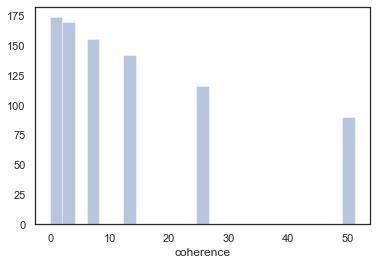

In [86]:
sns.distplot(df['coherence'],kde=False,bins=25)

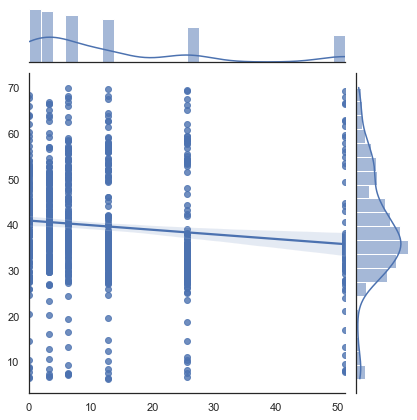

In [90]:
sns.jointplot(x=d,y=e,data=df,kind='reg')

<AxesSubplot:xlabel='coherence', ylabel='Density'>

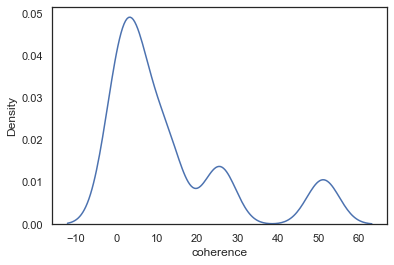

In [96]:
sns.kdeplot(df['coherence'])

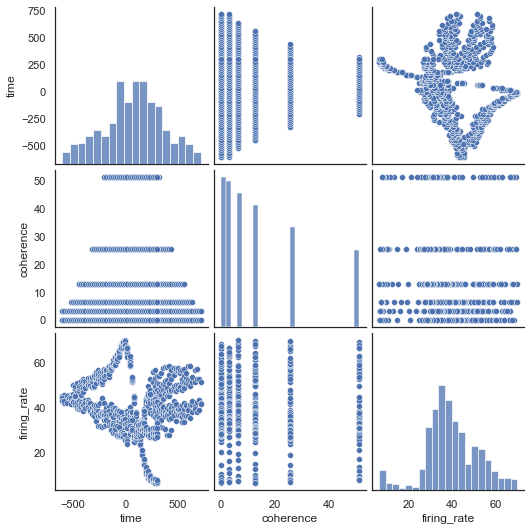

In [97]:
sns.pairplot(df)

<AxesSubplot:xlabel='coherence'>

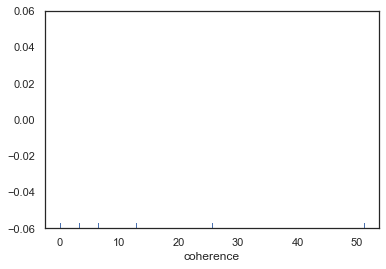

In [98]:
sns.rugplot(df['coherence'])

<Figure size 576x288 with 0 Axes>

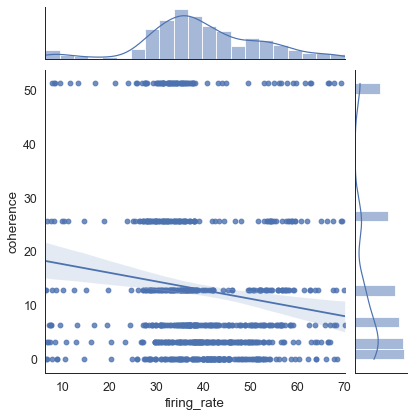

In [100]:
sns.set_style('white')
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.jointplot(x='firing_rate',y='coherence',data=df,kind='reg')
sns.despine(left=False,bottom=False)

<AxesSubplot:xlabel='coherence', ylabel='firing_rate'>

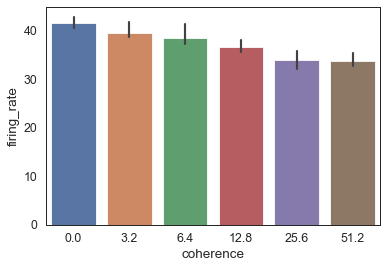

In [102]:
sns.barplot(x='coherence',y='firing_rate',data=df,estimator=np.median)

<AxesSubplot:xlabel='coherence', ylabel='count'>

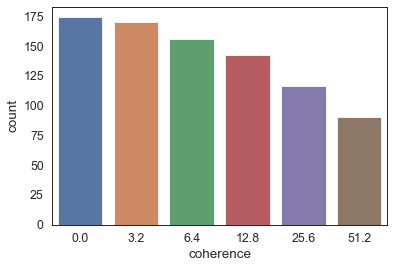

In [104]:
sns.countplot(x='coherence',data=df)

No handles with labels found to put in legend.


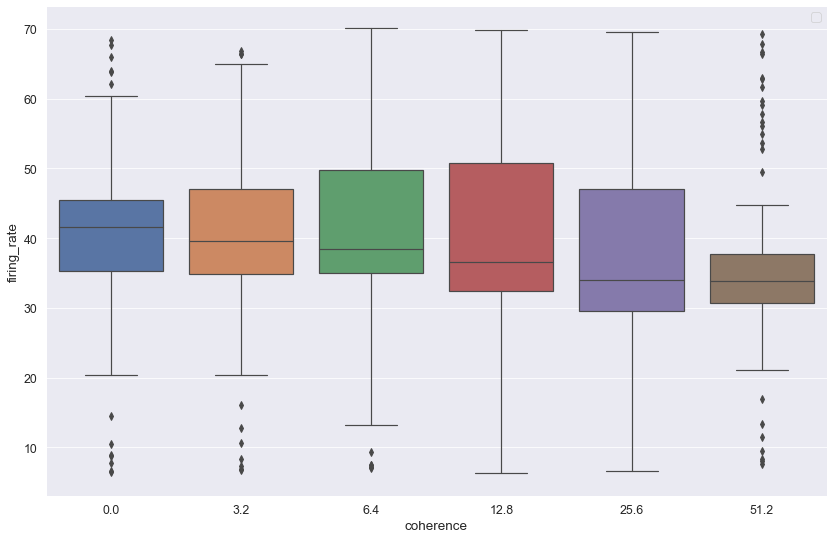

In [106]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x='coherence',y='firing_rate',data=df)
plt.legend(loc=0)

<AxesSubplot:xlabel='coherence', ylabel='firing_rate'>

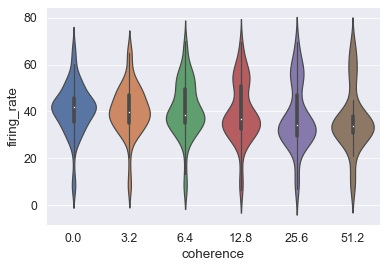

In [107]:
sns.violinplot(x='coherence',y='firing_rate',data=df,split=True)

<AxesSubplot:xlabel='coherence', ylabel='firing_rate'>

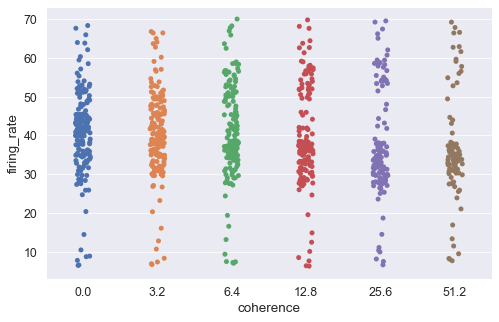

In [108]:
plt.figure(figsize=(8,5))
sns.stripplot(x='coherence',y='firing_rate',data=df,jitter=True,dodge=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points

<AxesSubplot:xlabel='coherence', ylabel='firing_rate'>

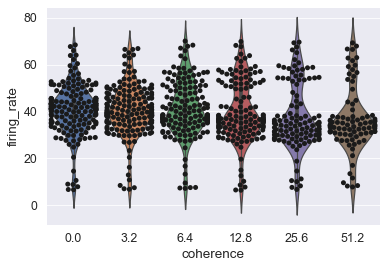

In [109]:
sns.violinplot(x='coherence',y='firing_rate',data=df)
sns.swarmplot(x='coherence',y='firing_rate',data=df,color='k')

No handles with labels found to put in legend.


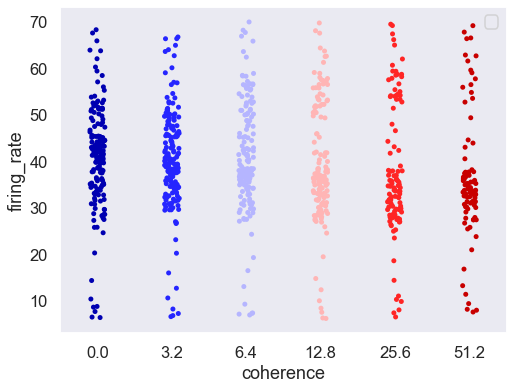

In [110]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='coherence',y='firing_rate',data=df,palette='seismic')
plt.legend(loc=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


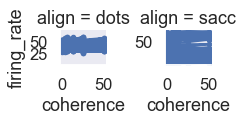

In [111]:
e=sns.FacetGrid(df,col='align',col_wrap=5,height=1.5)
e.map(plt.plot,'coherence','firing_rate',marker='.')